# DAV 6150 Module 12 Poject 3
#### Group Member: Yifeng Lin, Shichao Zhou

## Introduction

Our task for the Module 12 project is to construct a decision tree, a random forest, a gradient boosting classifier, a stochastic gradient descent classifier, and an XG Boost classifier for a provided data set and compare/contrast the performance of the varying models against one another. 
The data set we will be working with is comprised of more than 73,000 observations, each of which pertains to a 
particular NY State school district and associated subgroupings/categorizations of high school students who 
had been enrolled for at least 4 years as of the end of the 2018-2019 school year. The data source is from 
https://yu.instructure.com/courses/50398/assignments/191939.

Steps explanation:
- Data Dictionary
- Load dataset  into a Pandas dataframe
- Exploratory Data Analysis
- Data Preparation
  - create a new indicator variable named “dropout_pct_level”
  - One hot encoding for categorical data
  - standardize the numerical data
- Prepped Data Review (Re-run EDA)
- Decision Tree + Random Forest Modeling 
  - Feature selection 
  - Decision tree 
  - Random forest
  - gradient boosting classifier
  - stochastic gradient descent classifier
  - XG Boost classifier
- Select Models 
- Conclusion
- Reference

## Data Dictionary

- report_school_year: Indicates school year for which high school graduation info is being reported
- aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
- aggregation_type: Text description of how high school graduation data has been aggregated
- nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
- nrc_desc: Text description of the type of school district
- county_code: Numeric code for county name
- county_name: Full name of applicable NY State county
- nyc_ind: Indicates whether or not the school district resides within the borders of NYC
- membership_desc: Indicates school year in which students first enrolled in High School
- subgroup_code: Numeric code identifying student subgrouping
- subgroup_name: Text description of student subgrouping
- enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
- grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
- grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
- local_cnt:  How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
- local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
- reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
- reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
- non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non diploma credential
- non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
- still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
- ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
- ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
- dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
- dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year

# Load data

In [1]:
import pandas as pd
import numpy as np
# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt
# Import seaborn 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read data
data = pd.read_csv('https://raw.githubusercontent.com/675874815/DAV-5401/master/Project1_Data.csv')
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [3]:
# Check data size
data.shape

(73152, 29)

## Exploratory Data Analysis

Categorical Variables:
+ report_school_year
+ aggregation_index
+ aggregation_type
+ nrc_code
+ nrc_desc
+ county_code
+ county_name
+ nyc_ind
+ membership_desc
+ subgroup_code
+ subgroup_name

Numerical Variables:
+ enroll_cnt
+ grad_cnt
+ grad_pct
+ local_cnt
+ local_pct
+ reg_cnt
+ reg_pct 
+ reg_adv_cnt
+ reg_adv_pct
+ non_diploma_credential_cnt
+ non_diploma_credential_pct
+ still_enrolled_cnt
+ still_enrolled_pct
+ ged_cnt
+ ged_pct
+ dropout_cnt( It will be removed from the dataframe after a new indicator variable named"dropout_pct_level" be created.)
+ dropout_pct( It will be removed from the dataframe after a new indicator variable named"dropout_pct_level" be created.)

Reponse Variable:
+ A new indicator variable named “dropout_pct_level” having the three possible categorizations described above (i.e., “low”, “medium”, and “high”)  

In [4]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [5]:
# Replace '-' with nan
data.replace('-',np.nan,inplace = True)

In [6]:
# Check the number of null values 
data.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

In [7]:
# Remove null values
data = data.dropna()

In [8]:
# Check unique for each columns
data.nunique()

report_school_year               1
aggregation_index                1
aggregation_type                 1
aggregation_name               677
nrc_code                         6
nrc_desc                         6
county_code                     62
county_name                     62
nyc_ind                          2
membership_desc                  6
subgroup_code                   24
subgroup_name                   24
enroll_cnt                    1463
grad_cnt                      1714
grad_pct                       100
local_cnt                      331
local_pct                       80
reg_cnt                       1289
reg_pct                        101
reg_adv_cnt                    781
reg_adv_pct                     99
non_diploma_credential_cnt      75
non_diploma_credential_pct      46
still_enr_cnt                  407
still_enr_pct                   84
ged_cnt                         77
ged_pct                         31
dropout_cnt                    444
dropout_pct         

From the above output, we can find report_school_year,aggregation_index and aggregation_type have unique values. These three explanatory variables have no use-value. In addition, we will also delete aggregation_name because we found that aggregation_name is not mentioned in the data dictionary, and the aggregation_index and aggregation_index related to it have been deleted, So it doesn't make much sense to leave it for a separate analysis.

In [9]:
data.drop(['report_school_year','aggregation_index','aggregation_type','aggregation_name'],axis=1,inplace=True)

In [10]:
# Convert percentage into float data
def covert_numeric(col):
    data[col] = data[col].apply(str).replace("%","",regex = True).astype(float)/100 
    return data[col]
data['grad_pct'] = covert_numeric('grad_pct')
data['local_pct'] = covert_numeric('local_pct')
data['reg_pct'] = covert_numeric('reg_pct')
data['reg_adv_pct'] = covert_numeric('reg_adv_pct')
data['non_diploma_credential_pct'] = covert_numeric('non_diploma_credential_pct')
data['ged_pct'] = covert_numeric('ged_pct')
data['dropout_pct'] = covert_numeric('dropout_pct')
data['still_enr_pct'] = covert_numeric('still_enr_pct')

In [11]:
# Covert string into numeric
data["enroll_cnt"] = data["enroll_cnt"].astype("float64")
data["grad_cnt"] = data["grad_cnt"].astype("float64")
data["local_cnt"] = data["local_cnt"].astype("float64")
data["reg_cnt"] = data["reg_cnt"].astype("float64")
data["reg_adv_cnt"] = data["reg_adv_cnt"].astype("float64")
data["non_diploma_credential_cnt"] = data["non_diploma_credential_cnt"].astype("float64")
data["ged_cnt"] = data["ged_cnt"].astype("float64")
data["dropout_cnt"] = data["dropout_cnt"].astype("float64")
data["still_enr_cnt"] = data["still_enr_cnt"].astype("float64")

Numercial data

In [12]:
data_num = data[['enroll_cnt','grad_cnt','grad_pct','local_cnt','local_pct','reg_cnt','reg_pct','reg_adv_cnt','reg_adv_pct','non_diploma_credential_cnt','non_diploma_credential_pct','still_enr_cnt','still_enr_pct','ged_cnt','ged_pct','dropout_cnt','dropout_pct']]

In [13]:
# Turn the names of columns into list
column_num=data_num.columns.to_list()

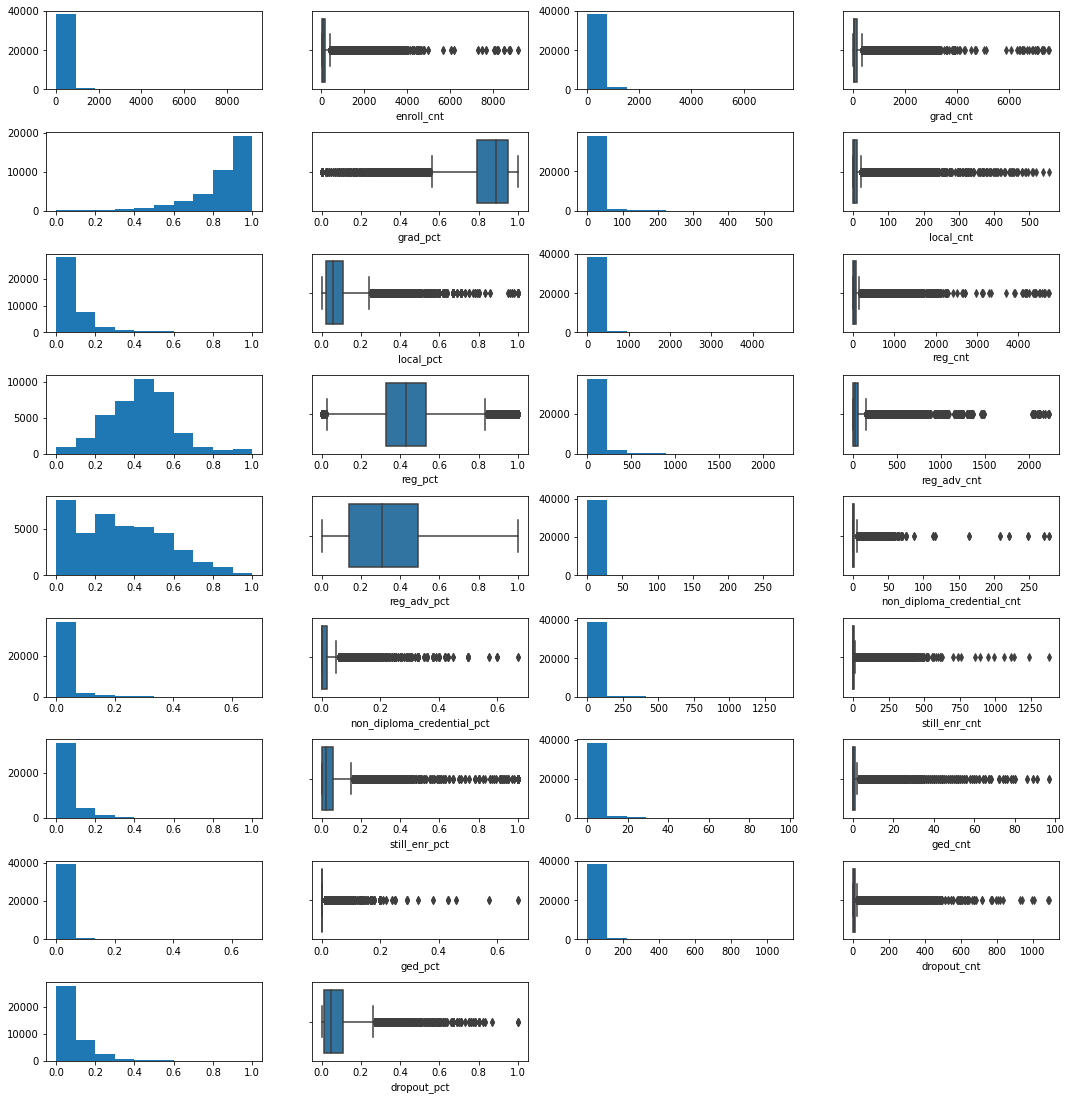

In [14]:
# Show the histogram and the boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(17):
    n=2*i
    plt.subplot(12,4,n+1)
    plt.hist(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    sns.boxplot(data_num[column_num[i]])
    
plt.tight_layout()

- Null negative outliers for each attribute.
- enroll cnt & grad cnt : The 'enroll cnt' and 'grad cnt' attributes have very similar data distribution and outliers. The number of student enrollment and graduation is mainly between 0-2000 range. But the enrollment count has outliers over the 6000-8000 range during the given school year, and the graduation count has outliers over 6000 at the end of the given school year.
- The attributes of local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,ged_cnt are relevant to the number of award a kind of diploma. The following describes the distribution interval of the data one by one.
 - local_cnt: The number of enrolled students of the indicated subgrouping who were awarded a "Local" diploma is mainly between 0-200 at the end of the given school year.
 - reg_cnt: The number of enrolled students of the indicated subgrouping was awarded a "Regents" diploma is mainly between 0-1000 at the end of the given school year. The outliers lie in the range over 2000.
 - reg_adv_cnt: The number of enrolled students of the indicated subgrouping was awarded a "Regents Advanced" diploma is mainly between 0-500 at the end of the given school year. The outliers lie in the range of over 1000.
 - non_diploma_credential_cnt: The number of enrolled students of the indicated subgrouping who achieved a non-diploma credential is mainly between 0-25 at the end of the given school year. The outliers lie in the range over 50.
 - ged_cnt: The number of enrolled students of the indicated subgrouping awarded a "GED" diploma is mainly between 0-30 at the end of the given school year. The outliers lie in the range over 60.
- still_enrolled_cnt: The attribute of still_enrolled_cnt shows the data distribution range from 0-500.
- dropout_cnt: The attribute of dropout_cnt shows the data distribution range from 0-200 during the school year.

- grad_pct: The percentage of enrolled students of the indicated subgrouping graduated at the end of the given school year mainly ranges from 0.4-0.9. The data outliers are between 0.0-0.2.
- local_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma range from 0.0-0.2. The data outliers are over 0.4.
- reg_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma range from 0.2-0.6. The data outliers are over 0.8.
- reg_adv_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced"  diploma range from 0.0-0.6.
- non_diploma_credential_pct: The percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential diploma range from 0.0-0.2. The data outliers are over 0.2.
- ged_pct: The percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma range from 0.0-0.2. The data outliers are over 0.2.
- still_enrolled_pct: The percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled range from 0.0-0.2. The data outliers are over 0.3.
- dropout_pct: The percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year range from 0.0-0.4. The data outliers are over 0.4. 


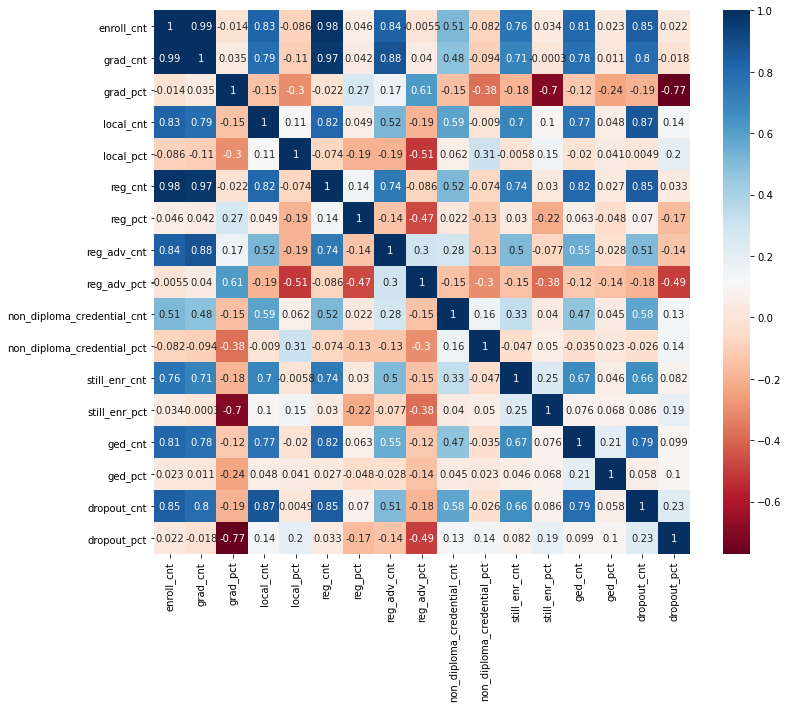

In [15]:
# View the correlation coefficient between numerical variables
# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))
corr = data_num.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
# Show the heatmap
plt.show()

In [16]:
data_num_matrix = data_num.corr()

In [17]:
data_num_matrix["dropout_pct"].sort_values(ascending=False)

dropout_pct                   1.000000
dropout_cnt                   0.230815
local_pct                     0.203903
still_enr_pct                 0.185580
non_diploma_credential_pct    0.140989
local_cnt                     0.135475
non_diploma_credential_cnt    0.129604
ged_pct                       0.104330
ged_cnt                       0.099411
still_enr_cnt                 0.081946
reg_cnt                       0.033453
enroll_cnt                    0.021982
grad_cnt                     -0.018238
reg_adv_cnt                  -0.139211
reg_pct                      -0.166014
reg_adv_pct                  -0.493922
grad_pct                     -0.770431
Name: dropout_pct, dtype: float64

- As previously written, the data distribution of enroll_cnt and grad cnt is highly similar. In addition, from the heatmap, they have a high correlation of 0.99. We will remove enroll cnt in the data preparation to eliminate the collinearity.
- We can notice that the correlation coefficient between attribute names ending in cnt (count) will generally be lower than attribute names ending in pct (percentage).Thereby indicating that the 'pct' attributes have lower entropy / higher information gain relative to the attribute from which we will be deriving the new categorical dropout-pct-level indicator. In the following data preparation, we will only retain the percentages and remove the counts.
- For dropout_pct, it has high negative relationship with grad_pct attributes and medium negative relationship with reg_adv_pct attributes. It has slightly positive relationships with local_pct,non_diploma_pct,non_diploma_pct,still_enr_pct,ged_pct attributes.
- The following attributes will be given priority in the subsequent numerical feature selection."local_pct,reg_adv_pct,still_enroll_pct,ged_pct,grad_pct,ged_pct,non_diploma_pct".

Categorical data

In [18]:
data_cat = data[['nrc_code','nrc_desc','county_code','county_name','nyc_ind','membership_desc','subgroup_code','subgroup_name']]

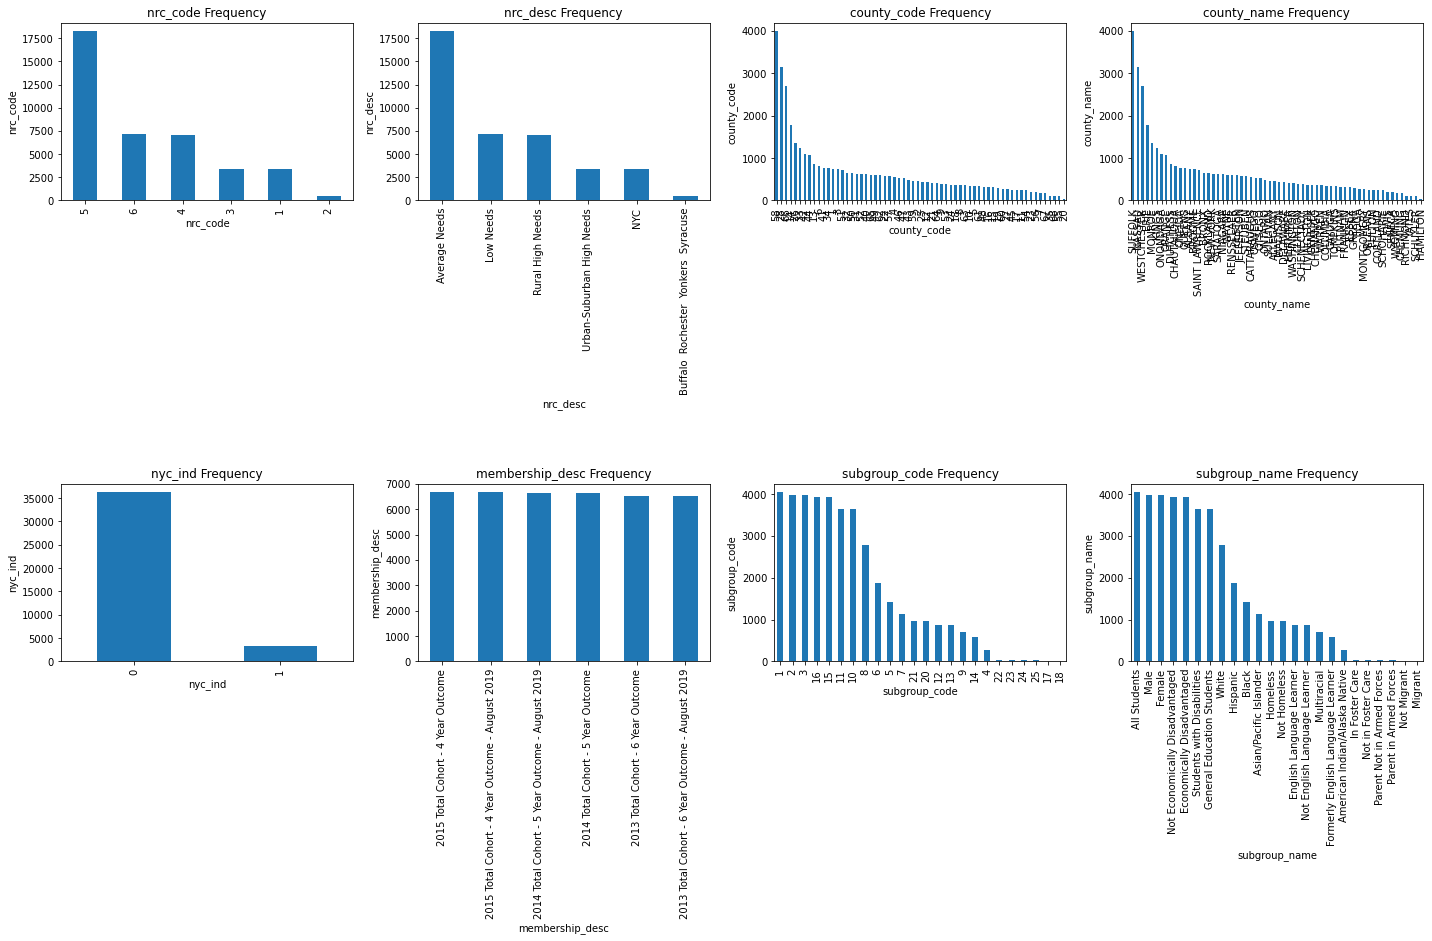

In [19]:
plt.figure(figsize = (20, 35))
for i, col in enumerate(data_cat):
    plt.subplot(6,4, i + 1)
    data_cat[col].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.title(str(col) + ' Frequency')
    plt.xlabel(col)
    plt.ylabel(col)

In [21]:
county_name_counts = data_cat.county_name.value_counts().to_frame().reset_index()
county_name_counts.columns = ['idx','counts']
total_counts = county_name_counts.counts.sum()
percentages = []
for c in county_name_counts.counts:
    percentages.append((c/total_counts) * 100)
county_name_counts['%'] = percentages
county_name_counts

,idx,counts,%
0,SUFFOLK,3996,10.072088
1,NASSAU,3152,7.944750
2,WESTCHESTER,2700,6.805465
3,ERIE,1770,4.461360
4,MONROE,1356,3.417856
...,...,...,...
57,CHEMUNG,174,0.438574
58,RICHMOND,108,0.272219
59,YATES,100,0.252054
60,SCHUYLER,94,0.236931


In [22]:
subgroup_name_counts = data_cat.subgroup_name.value_counts().to_frame().reset_index()
subgroup_name_counts.columns = ['idx','counts']
total_counts = subgroup_name_counts.counts.sum()
percentages = []
for c in subgroup_name_counts.counts:
    percentages.append((c/total_counts) * 100)
subgroup_name_counts['%'] = percentages
subgroup_name_counts

,idx,counts,%
0,All Students,4046,10.198115
1,Male,3970,10.006553
2,Female,3970,10.006553
3,Not Economically Disadvantaged,3918,9.875485
4,Economically Disadvantaged,3918,9.875485
5,Students with Disabilities,3632,9.154610
6,General Education Students,3632,9.154610
7,White,2790,7.032313
8,Hispanic,1878,4.733579
9,Black,1416,3.569088


- nrc_code & nrc_desc, county_code & county_name，subgroup_code & subgroup_name ：There are three sets of attributes that have exactly the same data distribution. In order to avoid repetition, we will not consider nrc_code，county_code and subgroup_code in subsequent data preparation. 
- county_name: We noticed that these two attributes have very many values. We can expect that after one-hot encoding, our number of columns will be huge. But we do not consider combining sparse data. As can be seen from the county name, the total number of combined sparse data will exceed the remaining individual county data. In order not to affect the accuracy of feature selection later, we will not combine sparse data

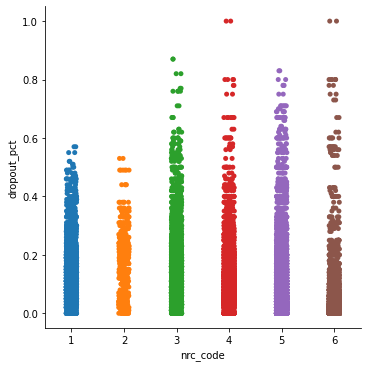

In [23]:
sns.catplot(x="nrc_code", y="dropout_pct", data=data)

- nrc_code: The top three frequency rankings are the type of school district and they are average needs, low needs, and rural high needs.The dropout pct of these three types of school districts is generally higher than 0.6. Later in feature selection step, we will also pay more attention to these types of three districts.


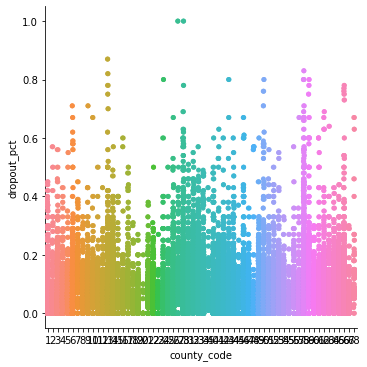

In [24]:
sns.catplot(x="county_code", y="dropout_pct", data=data)

- county_code: The top three frequency rankings are applicable NY state county and they are SUFFOLK, NASSAU, WESTCHESTER.The dropout pct of these three county is generally higher than 0.7. Later in feature selection step, we will also pay more attention to these types of three county.

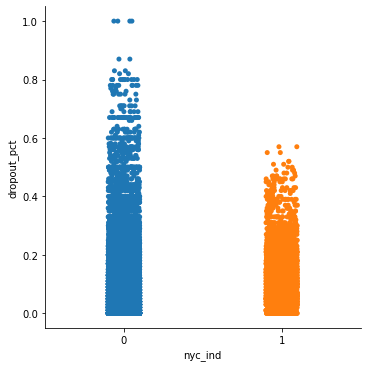

In [25]:
sns.catplot(x="nyc_ind", y="dropout_pct", data=data)

- nyc_ind: Most of the school districts that do not reside within the borders of NYC have more dropout percentage rate than the school that lives within the boundaries of NYC.

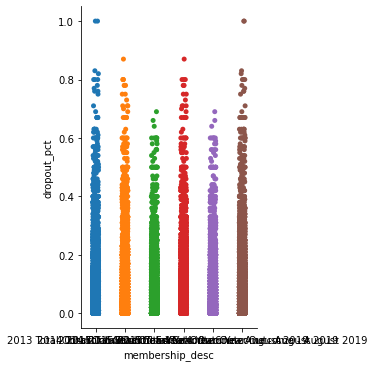

In [26]:
sns.catplot(x="membership_desc", y="dropout_pct", data=data)

- membership_desc: Except for '2013 total cohort-6 year outcome' and '6-year outcome August 2019', the other school year's dropout_pct are over 0.8.

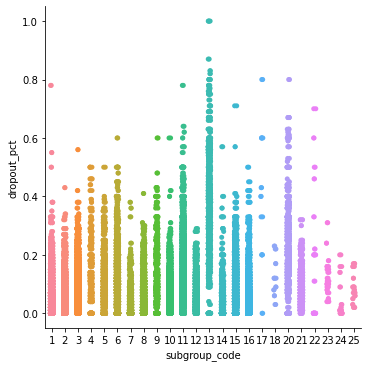

In [27]:
sns.catplot(x="subgroup_code", y="dropout_pct", data=data)

- subgroup_code: The top three frequency rankings are subgroups of all students, male,female,not economically disadvantaged and economically disadvantaged. The dropout pct of these subgroups is generally higher than 0.6. Later in the feature selection step, we will also pay more attention to these types of subgroups.

## Data Preparation

In this section, we will do the following steps based on the EDA.
- Create a new indicator variable named "dropout_pct_level"
- One hot encoding for categorical data
- Standardize the numerical data.

In [28]:
# create a new indicator variable named “reg_pct_level” having the three possible categorizations described above (i.e., “low”, “medium”, and “high”)
dropout_pct_level = []
for i in data['dropout_pct']:
    if i < 0.5 * data['dropout_pct'].median():
        dropout_pct_level.append('low')
    elif i >1.5 * data['dropout_pct'].median():
        dropout_pct_level.append('high')
    else:
        dropout_pct_level.append('medium')

In [29]:
data['dropout_pct_level'] = dropout_pct_level

In [30]:
# Replace low medium high with 1,2,3
data.dropout_pct_level.replace(['low','medium','high'], [1,2,3], inplace = True)

In [31]:
data.index = range(data.shape[0])

In [32]:
data.shape

(39674, 26)

In [33]:
data.head()

,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,...,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,dropout_pct_level
0,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,...,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22,3
1,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,...,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20,3
2,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,...,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25,3
3,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,...,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25,3
4,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98.0,58.0,...,0.05,4.0,0.04,8.0,0.08,0.0,0.0,28.0,0.29,3


In [34]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39674 entries, 0 to 73146
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nrc_code         39674 non-null  int64 
 1   nrc_desc         39674 non-null  object
 2   county_code      39674 non-null  int64 
 3   county_name      39674 non-null  object
 4   nyc_ind          39674 non-null  int64 
 5   membership_desc  39674 non-null  object
 6   subgroup_code    39674 non-null  int64 
 7   subgroup_name    39674 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.0+ MB


In [35]:
data_cat_update = data_cat.iloc[:,[1,3,4,5,7]]
data_cat_update.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic


In [36]:
# Convert to DUMMY VARIABLES
enc = OneHotEncoder(categories='auto').fit(data_cat_update)
result = enc.transform(data_cat_update).toarray()
df_cat_enc = pd.DataFrame(result)

In [37]:
# Check column name
enc.get_feature_names()

array(['x0_Average Needs', 'x0_Buffalo  Rochester  Yonkers  Syracuse',
       'x0_Low Needs', 'x0_NYC', 'x0_Rural High Needs',
       'x0_Urban-Suburban High Needs', 'x1_ALBANY', 'x1_ALLEGANY',
       'x1_BRONX', 'x1_BROOME', 'x1_CATTARAUGUS', 'x1_CAYUGA',
       'x1_CHAUTAUQUA', 'x1_CHEMUNG', 'x1_CHENANGO', 'x1_CLINTON',
       'x1_COLUMBIA', 'x1_CORTLAND', 'x1_DELAWARE', 'x1_DUTCHESS',
       'x1_ERIE', 'x1_ESSEX', 'x1_FRANKLIN', 'x1_FULTON', 'x1_GENESEE',
       'x1_GREENE', 'x1_HAMILTON', 'x1_HERKIMER', 'x1_JEFFERSON',
       'x1_KINGS', 'x1_LEWIS', 'x1_LIVINGSTON', 'x1_MADISON', 'x1_MONROE',
       'x1_MONTGOMERY', 'x1_NASSAU', 'x1_NEW YORK', 'x1_NIAGARA',
       'x1_ONEIDA', 'x1_ONONDAGA', 'x1_ONTARIO', 'x1_ORANGE',
       'x1_ORLEANS', 'x1_OSWEGO', 'x1_OTSEGO', 'x1_PUTNAM', 'x1_QUEENS',
       'x1_RENSSELAER', 'x1_RICHMOND', 'x1_ROCKLAND', 'x1_SAINT LAWRENCE',
       'x1_SARATOGA', 'x1_SCHENECTADY', 'x1_SCHOHARIE', 'x1_SCHUYLER',
       'x1_SENECA', 'x1_STEUBEN', 'x1_SUFFOLK', '

In [38]:
df_cat_enc.columns = ['x0_Average Needs', 'x0_Buffalo  Rochester  Yonkers  Syracuse',
       'x0_Low Needs', 'x0_NYC', 'x0_Rural High Needs',
       'x0_Urban-Suburban High Needs', 'x1_ALBANY', 'x1_ALLEGANY',
       'x1_BRONX', 'x1_BROOME', 'x1_CATTARAUGUS', 'x1_CAYUGA',
       'x1_CHAUTAUQUA', 'x1_CHEMUNG', 'x1_CHENANGO', 'x1_CLINTON',
       'x1_COLUMBIA', 'x1_CORTLAND', 'x1_DELAWARE', 'x1_DUTCHESS',
       'x1_ERIE', 'x1_ESSEX', 'x1_FRANKLIN', 'x1_FULTON', 'x1_GENESEE',
       'x1_GREENE', 'x1_HAMILTON', 'x1_HERKIMER', 'x1_JEFFERSON',
       'x1_KINGS', 'x1_LEWIS', 'x1_LIVINGSTON', 'x1_MADISON', 'x1_MONROE',
       'x1_MONTGOMERY', 'x1_NASSAU', 'x1_NEW YORK', 'x1_NIAGARA',
       'x1_ONEIDA', 'x1_ONONDAGA', 'x1_ONTARIO', 'x1_ORANGE',
       'x1_ORLEANS', 'x1_OSWEGO', 'x1_OTSEGO', 'x1_PUTNAM', 'x1_QUEENS',
       'x1_RENSSELAER', 'x1_RICHMOND', 'x1_ROCKLAND', 'x1_SAINT LAWRENCE',
       'x1_SARATOGA', 'x1_SCHENECTADY', 'x1_SCHOHARIE', 'x1_SCHUYLER',
       'x1_SENECA', 'x1_STEUBEN', 'x1_SUFFOLK', 'x1_SULLIVAN', 'x1_TIOGA',
       'x1_TOMPKINS', 'x1_ULSTER', 'x1_WARREN', 'x1_WASHINGTON',
       'x1_WAYNE', 'x1_WESTCHESTER', 'x1_WYOMING', 'x1_YATES', 'x2_0',
       'x2_1', 'x3_2013 Total Cohort - 6 Year Outcome',
       'x3_2013 Total Cohort - 6 Year Outcome - August 2019',
       'x3_2014 Total Cohort - 5 Year Outcome',
       'x3_2014 Total Cohort - 5 Year Outcome - August 2019',
       'x3_2015 Total Cohort - 4 Year Outcome',
       'x3_2015 Total Cohort - 4 Year Outcome - August 2019',
       'x4_All Students', 'x4_American Indian/Alaska Native',
       'x4_Asian/Pacific Islander', 'x4_Black',
       'x4_Economically Disadvantaged', 'x4_English Language Learner',
       'x4_Female', 'x4_Formerly English Language Learner',
       'x4_General Education Students', 'x4_Hispanic', 'x4_Homeless',
       'x4_In Foster Care', 'x4_Male', 'x4_Migrant', 'x4_Multiracial',
       'x4_Not Economically Disadvantaged',
       'x4_Not English Language Learner', 'x4_Not Homeless',
       'x4_Not Migrant', 'x4_Not in Foster Care',
       'x4_Parent Not in Armed Forces', 'x4_Parent in Armed Forces',
       'x4_Students with Disabilities', 'x4_White']

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
result = scaler.fit_transform(data_num.iloc[:,[2,4,6,8,10,12,14]])

In [41]:
data_num_st = pd.DataFrame(result)
data_num_st

,0,1,2,3,4,5,6
0,0.71,0.10,0.47,0.14,0.029851,0.05,0.0
1,0.76,0.09,0.52,0.15,0.014925,0.03,0.0
2,0.65,0.10,0.42,0.13,0.059701,0.06,0.0
3,0.68,0.11,0.50,0.06,0.044776,0.05,0.0
4,0.59,0.13,0.41,0.05,0.059701,0.08,0.0
...,...,...,...,...,...,...,...
39669,0.69,0.06,0.56,0.08,0.044776,0.03,0.0
39670,0.90,0.06,0.67,0.17,0.000000,0.00,0.0
39671,0.15,0.00,0.15,0.00,0.343284,0.15,0.0
39672,0.70,0.00,0.61,0.09,0.134328,0.00,0.0


In [42]:
data_num_st.columns = ['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct']

In [43]:
df = pd.concat([df_cat_enc,data_num_st],axis=1)
df.shape

(39674, 107)

In [44]:
df

,x0_Average Needs,x0_Buffalo Rochester Yonkers Syracuse,x0_Low Needs,x0_NYC,x0_Rural High Needs,x0_Urban-Suburban High Needs,x1_ALBANY,x1_ALLEGANY,x1_BRONX,x1_BROOME,...,x4_Parent in Armed Forces,x4_Students with Disabilities,x4_White,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.71,0.10,0.47,0.14,0.029851,0.05,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.76,0.09,0.52,0.15,0.014925,0.03,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,0.10,0.42,0.13,0.059701,0.06,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.68,0.11,0.50,0.06,0.044776,0.05,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.59,0.13,0.41,0.05,0.059701,0.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.69,0.06,0.56,0.08,0.044776,0.03,0.0
39670,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.90,0.06,0.67,0.17,0.000000,0.00,0.0
39671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.15,0.00,0.15,0.00,0.343284,0.15,0.0
39672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.70,0.00,0.61,0.09,0.134328,0.00,0.0


In [45]:
df['dropout_pct_level'] = data['dropout_pct_level']

In [46]:
df

,x0_Average Needs,x0_Buffalo Rochester Yonkers Syracuse,x0_Low Needs,x0_NYC,x0_Rural High Needs,x0_Urban-Suburban High Needs,x1_ALBANY,x1_ALLEGANY,x1_BRONX,x1_BROOME,...,x4_Students with Disabilities,x4_White,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct_level
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.71,0.10,0.47,0.14,0.029851,0.05,0.0,3
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.76,0.09,0.52,0.15,0.014925,0.03,0.0,3
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.65,0.10,0.42,0.13,0.059701,0.06,0.0,3
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.68,0.11,0.50,0.06,0.044776,0.05,0.0,3
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.59,0.13,0.41,0.05,0.059701,0.08,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.69,0.06,0.56,0.08,0.044776,0.03,0.0,3
39670,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.90,0.06,0.67,0.17,0.000000,0.00,0.0,3
39671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.15,0.00,0.15,0.00,0.343284,0.15,0.0,3
39672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.70,0.00,0.61,0.09,0.134328,0.00,0.0,3


## Prepped Data Review

In this section,we will re-run EDA on the variables adjusted during data preparation work.

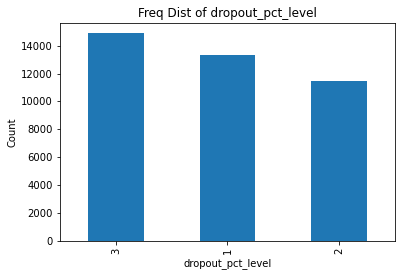

In [47]:
# Create a bar plot for the "reg_pct_level" attribute
bplt1 = df['dropout_pct_level'].value_counts().plot.bar(title = "Freq Dist of dropout_pct_level")
plt.xlabel('dropout_pct_level')
plt.ylabel('Count')
bplt1;

- From the above barplot, we can find most of the percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year is high level. The "high" means that  indicates that the percentage of dropouts for a given school district / student subgrouping exceeds 1.5 * the median percentage of all dropouts (i.e., across all school district / student subgroupings).
- The values of "Low" and "medium" account for less than the "high" level in the total number of dropout_pct_level. 

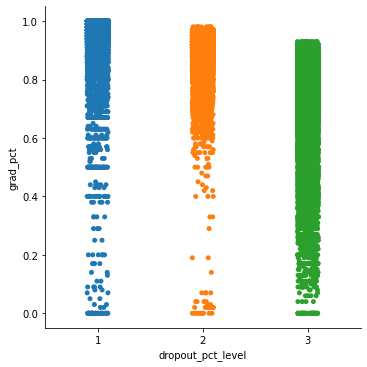

In [48]:
sns.catplot(x="dropout_pct_level", y="grad_pct", data=df)

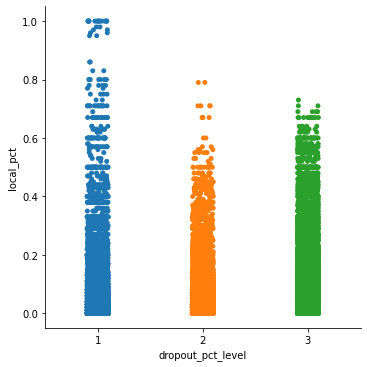

In [49]:
sns.catplot(x="dropout_pct_level", y="local_pct", data=df)

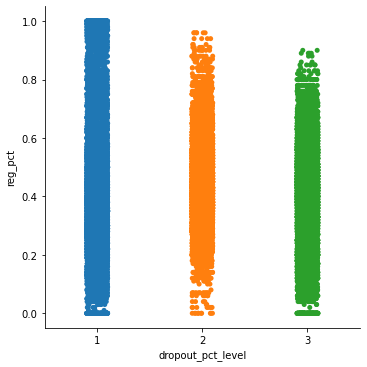

In [50]:
sns.catplot(x="dropout_pct_level", y="reg_pct", data=df)

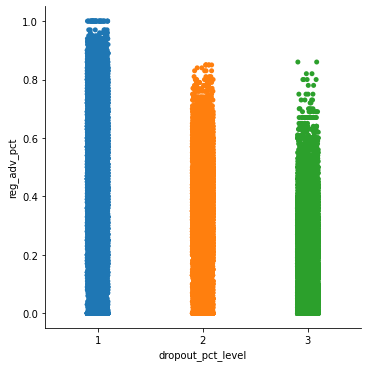

In [51]:
sns.catplot(x="dropout_pct_level", y="reg_adv_pct", data=df)

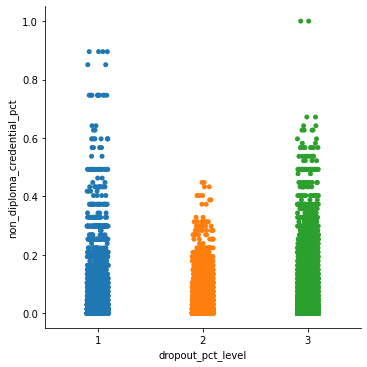

In [52]:
sns.catplot(x="dropout_pct_level", y="non_diploma_credential_pct", data=df)

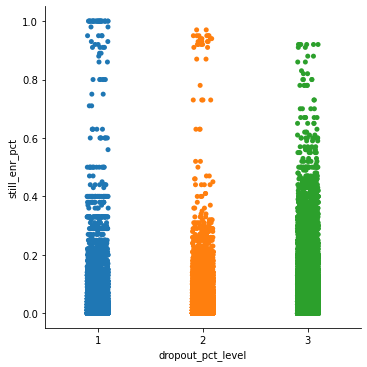

In [53]:
sns.catplot(x="dropout_pct_level", y="still_enr_pct", data=df)

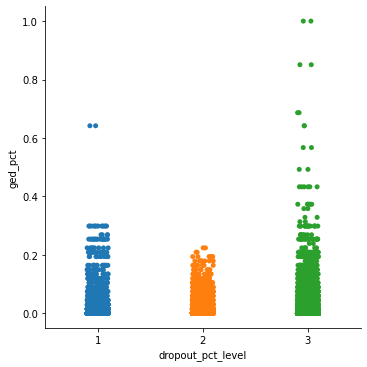

In [54]:
sns.catplot(x="dropout_pct_level", y="ged_pct", data=df)

## Classifier Modeling

In this section, we will do feature selection and create a decision tree model, a random forest models, a gradient boosting classifier model, a stochastic gradient descent classifier model, and a XG boost classifier model.

- We will use the chi-square test to select the top 10 categorical features. The reason we use it is that the method is to test the independence of two variables. We can measure how expected observed values and expected values deviate from each other. 
- We will use the f_regression test (linear dependency) and EDA results to select the top five numerical features as the first features for modeling. 
- In feature selection, we aim to select the features which are highly dependent on the response. A higher score means more dependent variables.

In [55]:
# Select features for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_cat_enc
y = df.iloc[:,-1]
print("Feature data dimension: ", X.shape)
print("----")
select = SelectKBest(score_func=chi2, k=10)
fit = select.fit(X,y)
# type(fit)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# Print 10 best features
print(featureScores.nlargest(10,'Score'))

Feature data dimension:  (39674, 100)
----
                             Features        Score
2                        x0_Low Needs  5571.969993
5        x0_Urban-Suburban High Needs  2139.478165
3                              x0_NYC  1745.474348
69                               x2_1  1745.474348
35                          x1_NASSAU  1313.084469
81        x4_English Language Learner  1109.635266
65                     x1_WESTCHESTER  1054.946562
91  x4_Not Economically Disadvantaged   852.967415
78          x4_Asian/Pacific Islander   819.709071
86                        x4_Homeless   748.092291


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=7)
X = data_num_st
y = df.iloc[:,-1]
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# Naming the dataframe columns
featureScores.columns = ['Features','Score'] 
# Print 5 best features
print(featureScores.nlargest(7,'Score'))

                     Features         Score
0                    grad_pct  20449.056509
3                 reg_adv_pct  12657.113955
1                   local_pct   1781.090086
5               still_enr_pct   1120.168462
4  non_diploma_credential_pct    627.402072
6                     ged_pct    510.042898
2                     reg_pct      0.000396


In [57]:
x1 = df[['x0_Low Needs', 'x0_Urban-Suburban High Needs','x0_NYC', 
         'x2_1', 'x1_NASSAU', 
         'x4_English Language Learner', 'x1_WESTCHESTER','x4_Not Economically Disadvantaged','x4_Asian/Pacific Islander',
         'x4_Homeless','grad_pct','reg_adv_pct','local_pct','still_enr_pct','non_diploma_credential_pct']]

In [58]:
from sklearn.model_selection import train_test_split
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=12, stratify=df['dropout_pct_level'])

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Decision Tree 

 hyperparameters:
 - max_depth: The maximum depth of the tree. We will use cross-validation(10 fold) to find the optimal maximum depth of the tree.
 - class_weight: Weights associated with classes in the form {class_label: weight}.  Use class weights when we have an imbalanced dataset and want to improve single-label classification results. Class weights on the Peltarion Platform are inversely proportional to the class frequency in the training data.
 - criterion = 'gini': It measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled. The gini criterion is much faster than entropy with less computationally expensive. The results of gini are very close to entropy, so we do not need to use the entropy criterion and spend too much time in training. 
( https://quantdare.com/decision-trees-gini-vs-entropy/ )

0.9257856433062596 20


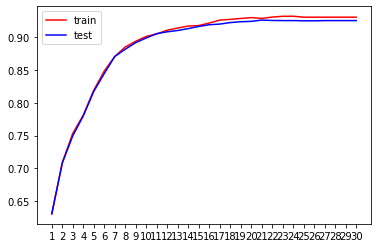

In [60]:
# Find the optimal max_depth 
tr = []
te = []
for i in range(30):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion = 'gini')
    clf = clf.fit(X1_train, y1_train)
    score_tr = clf.score(X1_test, y1_test)
    score_te = cross_val_score(clf,X1_train,y1_train,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te),te.index(max(te)))
plt.plot(range(1,31),tr,color="red",label="train")
plt.plot(range(1,31),te,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

Under normal circumstances, decision trees will be over-fitting in the training set. From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 29, so we choose 29 for the maximum depth.

In [61]:
# Value_count the reg_pct_level
df['dropout_pct_level'].value_counts() / df['dropout_pct_level'].shape[0]

3    0.375057
1    0.335610
2    0.289333
Name: dropout_pct_level, dtype: float64

Use class weights when you have an imbalanced dataset and want to improve single-label classification results. Class weights on the Peltarion Platform are inversely proportional to the class frequency in the training data.

In [65]:
dt1 = DecisionTreeClassifier(random_state=25,max_depth=20,criterion = 'gini',
                             class_weight = {3: 1.0, 1: 1.11, 2:1.29})
DT1 = dt1.fit(X1_train, y1_train)

### Random Forset 

hyperparameters:
- n_estimators: The number of trees in the forest. We will use cross validation to find the optimal estimators.
- n_jobs:The number of jobs to run in parallel.  -1 means using all processors.
- max_depth: The maximum depth of the tree.We will use cross validation to find the optimal estimators.

In [66]:
from sklearn.ensemble import RandomForestClassifier

0.9373804622097642 171


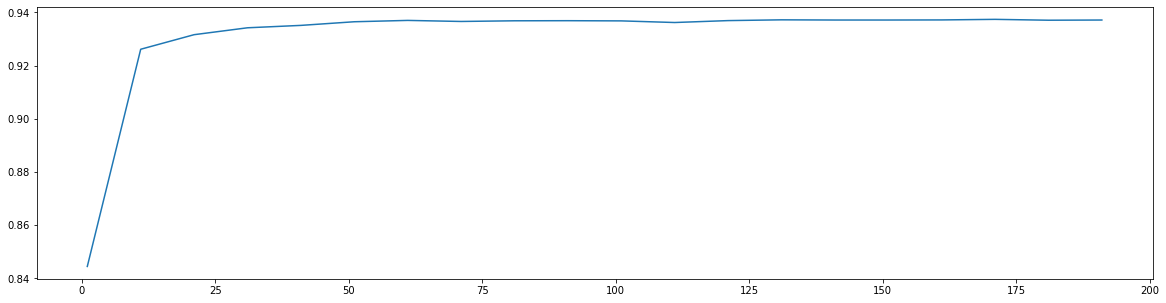

In [67]:
# Find the optimal estimators
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=25)
    score = cross_val_score(rfc,X1_train,y1_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

From this plot, we can see that when n_estimators = 171, the accuracy of this model reaches the highest point, so we choose 171 as of this model's n_estimators.

0.937776599046005 27


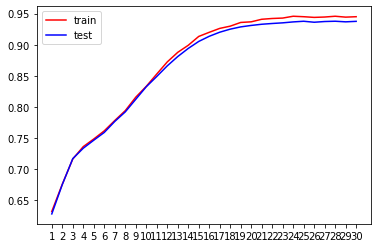

In [68]:
# Find the optimal max_depth 
rfr = []
rfe = []
for i in range(30):
    clf = RandomForestClassifier(random_state=25,max_depth=i+1,criterion = 'gini', n_estimators=171, n_jobs=-1)
    clf = clf.fit(X1_train, y1_train)
    score_rfr = clf.score(X1_test, y1_test)
    score_rfe = cross_val_score(clf,X1_train,y1_train,cv=10).mean()
    rfr.append(score_rfr)
    rfe.append(score_rfe)
print(max(rfe),rfe.index(max(rfe)))
plt.plot(range(1,31),rfr,color="red",label="train")
plt.plot(range(1,31),rfe,color="blue",label="test")
plt.xticks(range(1,31))
plt.legend()
plt.show()

From this plot, we can see that in the case of relatively high accuracy of the training set, the accuracy of the test set reaches the highest at 27, so we choose 27 for the maximum depth.

In [69]:
rfc1 = RandomForestClassifier(n_estimators=171,n_jobs=-1,random_state=25,max_depth = 27,class_weight = {3: 1.0, 1: 1.11, 2:1.29})
RFC1 = rfc1.fit(X1_train, y1_train)

### Gradient Boosting Classifier

hyperparameters:
- n_estimators: The number of estimators as selected by early stopping (if n_iter_no_change is specified). Otherwise it is set to n_estimators.
- learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [70]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

810 0.9317993590436067


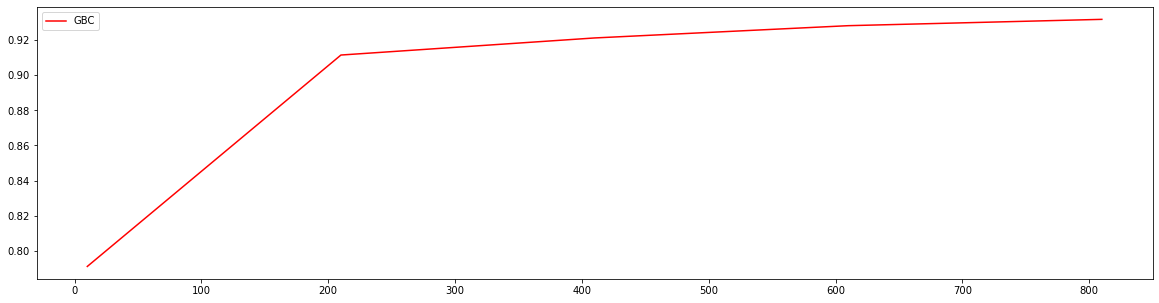

In [71]:
axisx = range(10,1010,200)
score1 = []
for i in axisx:
    clf = GBC(n_estimators=i,random_state=25) 
    clf.fit(X1_train, y1_train)
    score1.append(clf.score(X1_train, y1_train))
print(axisx[score1.index(max(score1))],max(score1))
plt.figure(figsize=(20,5))
plt.plot(axisx,score1,c="red",label="GBC")
plt.legend()
plt.show()

Let's see what the performance was for different learning rates:

In [72]:
lr_list = np.arange(0.1,1,0.1)

for learning_rate in lr_list:
    clf = GBC(n_estimators=810, learning_rate=learning_rate, random_state=25)
    clf.fit(X1_train, y1_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(clf.score(X1_train, y1_train))) 
    print("Accuracy score (validation): {0:.3f}".format(clf.score(X1_test, y1_test)))

Learning rate:  0.1
Accuracy score (training): 0.932
Accuracy score (validation): 0.916
Learning rate:  0.2
Accuracy score (training): 0.945
Accuracy score (validation): 0.921
Learning rate:  0.30000000000000004
Accuracy score (training): 0.954
Accuracy score (validation): 0.924
Learning rate:  0.4
Accuracy score (training): 0.962
Accuracy score (validation): 0.928
Learning rate:  0.5
Accuracy score (training): 0.967
Accuracy score (validation): 0.929
Learning rate:  0.6
Accuracy score (training): 0.971
Accuracy score (validation): 0.931
Learning rate:  0.7000000000000001
Accuracy score (training): 0.975
Accuracy score (validation): 0.932
Learning rate:  0.8
Accuracy score (training): 0.950
Accuracy score (validation): 0.917
Learning rate:  0.9
Accuracy score (training): 0.922
Accuracy score (validation): 0.901


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.7 gives us the best performance on the validation set and good performance on the training set.

In [73]:
gb_clf = GBC(n_estimators=810, learning_rate=0.7, random_state=25)
gb_clf.fit(X1_train, y1_train)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=810, random_state=25)

### Stochastic Gradient Descent Classifier

hyperparameters:
- loss:The loss function to be used. 
- penalty:The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.
- max_iter:The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.
- learning_rate: default=’optimal’,eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

In [74]:
from sklearn.linear_model import SGDClassifier

modified_huber 0.8635267005149256


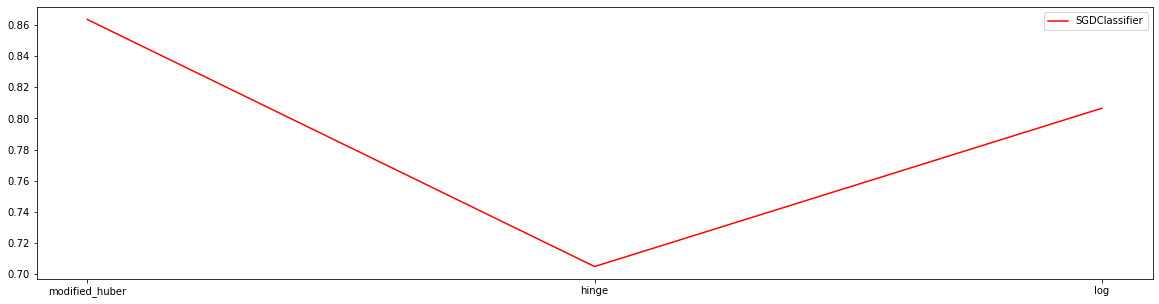

In [75]:
loss = ['modified_huber','hinge', 'log']
score1 = []
for i in loss:
    clf = SGDClassifier(loss = i, random_state=25) 
    clf.fit(X1_train, y1_train)
    score1.append(clf.score(X1_train, y1_train))
print(loss[score1.index(max(score1))],max(score1))
plt.figure(figsize=(20,5))
plt.plot(loss,score1,c="red",label="SGDClassifier")
plt.legend()
plt.show()

l1 0.8975910122069785


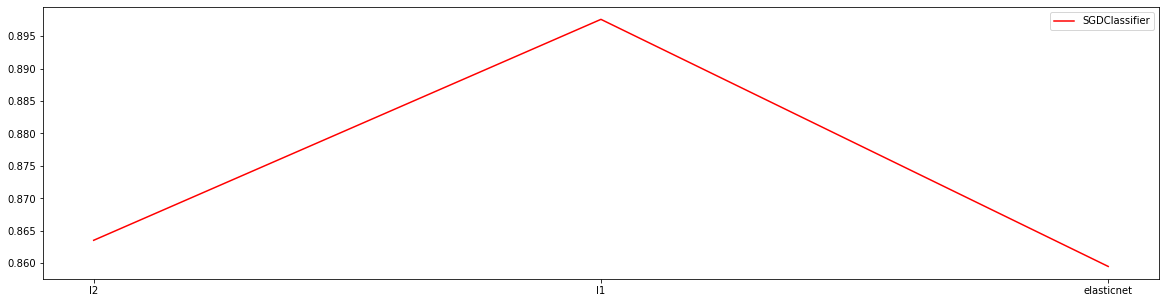

In [76]:
penalty = ['l2','l1','elasticnet']
score1 = []
for i in penalty:
    clf = SGDClassifier(loss = 'modified_huber', penalty = i, random_state=25) 
    clf.fit(X1_train, y1_train)
    score1.append(clf.score(X1_train, y1_train))
print(penalty[score1.index(max(score1))],max(score1))
plt.figure(figsize=(20,5))
plt.plot(penalty,score1,c="red",label="SGDClassifier")
plt.legend()
plt.show()

60 0.9022361456195311


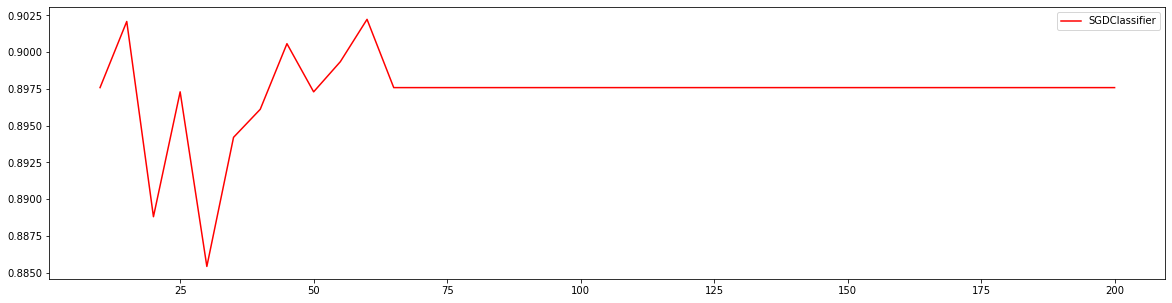

In [77]:
max_iter = range(10,205,5)
score1 = []
for i in max_iter:
    clf = SGDClassifier(loss = 'modified_huber', penalty = 'l1', max_iter = i, random_state=25) 
    clf.fit(X1_train, y1_train)
    score1.append(clf.score(X1_train, y1_train))
print(max_iter[score1.index(max(score1))],max(score1))
plt.figure(figsize=(20,5))
plt.plot(max_iter,score1,c="red",label="SGDClassifier")
plt.legend()
plt.show()

In [78]:
gd_clf = SGDClassifier(loss = 'modified_huber', penalty = 'l1', max_iter = 60, random_state=25) 
gd_clf.fit(X1_train, y1_train)

SGDClassifier(loss='modified_huber', max_iter=60, penalty='l1', random_state=25)

### XG Boost Classifier

hyperparameters:
- n_estimators: The number of estimators as selected by early stopping (if n_iter_no_change is specified). Otherwise it is set to n_estimators.
- learning_rate: Learning rate shrinks the contribution of each tree by learning_rate. 

In [81]:
from xgboost import XGBClassifier as XGBC

[19:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

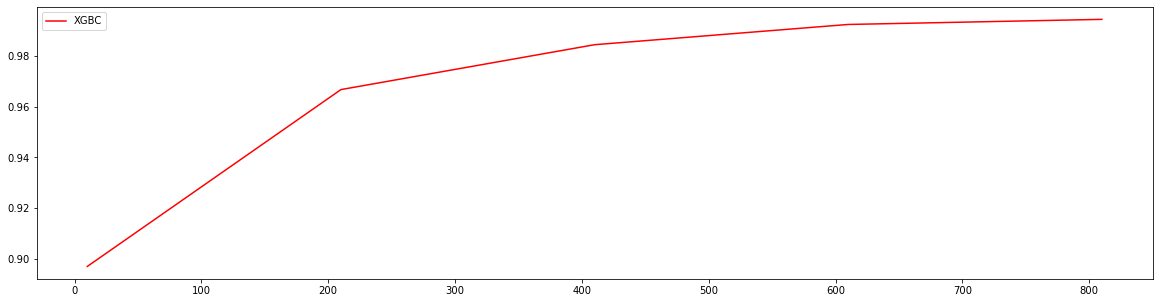

In [82]:
axisx = range(10,1010,200)
score1 = []
for i in axisx:
    clf = XGBC(n_estimators=i,random_state=25)
    clf.fit(X1_train, y1_train)
    score1.append(clf.score(X1_train, y1_train))
print(axisx[score1.index(max(score1))],max(score1))
plt.figure(figsize=(20,5))
plt.plot(axisx,score1,c="red",label="XGBC")
plt.legend()
plt.show()

In [83]:
lr_list = np.arange(0.1,1,0.1)

for learning_rate in lr_list:
    xgb_clf = XGBC(n_estimators=810, learning_rate=learning_rate, random_state=25)
    xgb_clf.fit(X1_train, y1_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X1_train, y1_train))) 
    print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X1_test, y1_test)))

[19:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate:  0.1
Accuracy score (training): 0.973
Accuracy score (validation): 0.937
[19:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate:  0.2
Accuracy score (training): 0.990
Accuracy score (validation): 0.947
[19:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' wa

We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.6 gives us the best performance on the validation set and good performance on the training set.

In [84]:
xgb_clf = XGBC(n_estimators=810, learning_rate=0.6, random_state=25)
xgb_clf.fit(X1_train, y1_train)

[19:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=810, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Select Models

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
accuracyDT = cross_val_score(dt1,X1_train,y1_train,cv=10).mean()
accuracyDT

0.9247054445223064

In [87]:
accuracyRFC = cross_val_score(rfc1,X1_train,y1_train,cv=10).mean()
accuracyRFC

0.9381366480238658

In [88]:
accuracyGB = cross_val_score(gb_clf,X1_train,y1_train,cv=10).mean()
accuracyGB

0.9261815468158299

In [89]:
accuracyGD = cross_val_score(gd_clf,X1_train,y1_train,cv=10).mean()
accuracyGD

0.8889843367806052

In [90]:
accuracyXGB = cross_val_score(xgb_clf,X1_train,y1_train,cv=10).mean()
accuracyXGB

[19:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9439700740397375

In [91]:
precisionDT = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='precision_weighted').mean()
precisionDT

0.9249701565921044

In [92]:
precisionRFC = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='precision_weighted').mean()
precisionRFC

0.9384010851324686

In [93]:
precisionGB = cross_val_score(gb_clf,X1_train,y1_train,cv=10,scoring='precision_weighted').mean()
precisionGB

0.926589057161539

In [94]:
precisionGD = cross_val_score(gd_clf,X1_train,y1_train,cv=10,scoring='precision_weighted').mean()
precisionGD

0.889672469151645

In [95]:
precisionXGB = cross_val_score(xgb_clf,X1_train,y1_train,cv=10,scoring='precision_weighted').mean()
precisionXGB

[19:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9441557542048461

In [96]:
recallDT = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='recall_weighted').mean()
recallDT

0.9247054445223064

In [97]:
recallRFC = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='recall_weighted').mean()
recallRFC

0.9381366480238658

In [98]:
recallGB = cross_val_score(gb_clf,X1_train,y1_train,cv=10,scoring='recall_weighted').mean()
recallGB

0.9261815468158299

In [99]:
recallGD = cross_val_score(gd_clf,X1_train,y1_train,cv=10,scoring='recall_weighted').mean()
recallGD

0.8889843367806052

In [100]:
recallXGB = cross_val_score(xgb_clf,X1_train,y1_train,cv=10,scoring='recall_weighted').mean()
recallXGB

[20:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9439700740397375

In [101]:
f1DT = cross_val_score(dt1,X1_train,y1_train,cv=10,scoring='f1_weighted').mean()
f1DT

0.9247793737784175

In [102]:
f1RFC = cross_val_score(rfc1,X1_train,y1_train,cv=10,scoring='f1_weighted').mean()
f1RFC

0.9380646727704898

In [103]:
f1GB = cross_val_score(gb_clf,X1_train,y1_train,cv=10,scoring='f1_weighted').mean()
f1GB

0.9261962585386779

In [104]:
f1GD = cross_val_score(gd_clf,X1_train,y1_train,cv=10,scoring='f1_weighted').mean()
f1GD

0.8866197220049562

In [105]:
f1XGB = cross_val_score(xgb_clf,X1_train,y1_train,cv=10,scoring='f1_weighted').mean()
f1XGB

[20:13:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9439668482918655

| Metric        | Model dt | Model rf | Model gbc | Model sgdc | Model xgb
| ------------- | ------- | -------      |------    |-------   |-------
| # Indep. Vars |  15     |   15      |   15    |   15    |   15     
| Accuracy      | 0.9247  | 0.9381    | 0.9261   | 0.8889 |0.9439
| Precision     | 0.9249  | 0.9384    | 0.9265   | 0.8896  | 0.9441
| Recall   | 0.9247  | 0.9381         | 0.9261   | 0.8889 | 0.9439
| F1 Score      | 0.9247  | 0.9380    | 0.9262   | 0.8866  | 0.9439

We select xgboost model as our preferred model.

Reasons:
- We can see at a glance that among the five models, all the XGboost model's scores rank the highest among all the models.XGBoost and Gradient Boosting are ensemble tree methods that apply the principle of boosting weak learners using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements. Therefore, it is reasonable that the XGboost score is higher than gradient boosting.
- The SGDC scores are much lower than that of other models. We believe that the reason is that we have adjusted more parameters than other models and added more restrictions, so the score of this model is much lower than other models.

In [106]:
# predict class labels for the test set
predicted = xgb_clf.predict(X1_test)
predicted

array([2, 1, 3, ..., 3, 2, 3], dtype=int64)

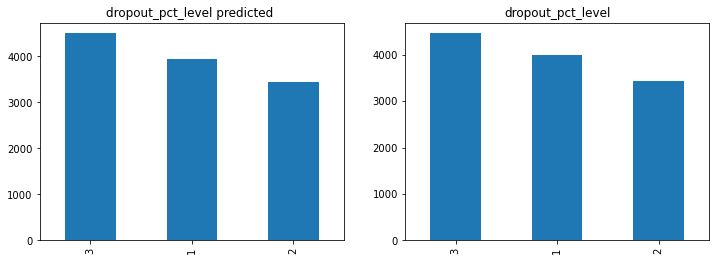

predicted:  3    4502
1    3952
2    3449
Name: dropout_pct_level, dtype: int64
3    4464
1    3995
2    3444
Name: dropout_pct_level, dtype: int64


In [107]:
# Make two bar plots to display the actual and predict reg_pct_level data distribution 
predicted1 = pd.DataFrame(predicted,columns=['dropout_pct_level'])
plt.figure(figsize=(12,4))
# Plot 1 
plt.subplot(1,2,1)
predicted1.dropout_pct_level.value_counts().plot(kind='bar');
plt.title('dropout_pct_level predicted ')
# Plot 2
plt.subplot(1,2,2)
y1_test.value_counts().plot(kind='bar');
plt.title('dropout_pct_level')
plt.show()

print("predicted: ",predicted1.dropout_pct_level.value_counts())
print(y1_test.value_counts())

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. 

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, predicted1))
print(classification_report(y1_test, predicted1))

[[3800  157   38]
 [ 134 3176  134]
 [  18  116 4330]]
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      3995
           2       0.92      0.92      0.92      3444
           3       0.96      0.97      0.97      4464

    accuracy                           0.95     11903
   macro avg       0.95      0.95      0.95     11903
weighted avg       0.95      0.95      0.95     11903



The average testing score(precision, recall, f1) of decision tree model 1 is 0.95, better than the train set score(precision, recall, f1) of 0.94. The preferred model performs as well as expected.

## Conclusion

- In this project,we created a new categorical indicator variable (dropout_pct_level) derived from the content of the dropout_pct attribute as our response variable. 
- We constructed five models.That ensemble tree algorithms perform well on the dataset. We choose the XGboost model as our preferred model to test the subset and we have got the results as well as expected.
- In the subsequent improvements, we believe that the parameters that we adjusted of the models should be consistent. In this way, the performance between the models can be better compared.

# Reference
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html